# <center>Assignment #1. Spring 2019 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1Q_5rY7Paed4Xc_THtrfE3OSaB3sJerYuJ7NCHtqRbKs). Solutions will be shared only with those who've filled in this form 
 3. submit answers with some email and **remember it**! This will be your ID during the course. Specify your real full name in the form as well (no nicks allowed in the final top-100 [rating](https://mlcourse.ai/rating)). If in doubt, you can re-submit the form till the deadline for A1, no problem, but stick to only one email.
 
### <center> Deadline for A1: 2019 February 24, 20:59 GMT (London time)
    
You'll get up to 12 credits for this assignment - the web-form score will be halved and rounded.

### How to get help
In [ODS Slack](https://opendatascience.slack.com) (if you still don't have access, fill in the [form](https://docs.google.com/forms/d/1BMqcUc-hIQXa0HB_Q2Oa8vWBtGHXk8a6xo5gPnMKYKA/edit) mentioned on the mlcourse.ai main page), we have a channel **#mlcourse_ai_news** with announcements from the course team.
You can discuss the course content freely in the **#mlcourse_ai** channel (we still have a huge Russian-speaking group, they have a separate channel **#mlcourse_ai_rus**).

Here's how you reply in a thread (press this dialog icon to drill down into a thread):

<img src="../../img/start_a_thread.png" />

Please stick to special threads for your questions:
 - [#a1_q1-5](https://opendatascience.slack.com/archives/C91N8TL83/p1549882488049500) for questions 1-5 below
 - [#a1_q6-10](https://opendatascience.slack.com/archives/C91N8TL83/p1549882494049700) for questions 6-10 below
 - [#a1_q11-15](https://opendatascience.slack.com/archives/C91N8TL83/p1549882499049900) for questions 11-15 below
 - [#a1_q16-20](https://opendatascience.slack.com/archives/C91N8TL83/p1549882508050200) for questions 16-20 below
 
Help each other without sharing correct code and answers. Our TA Maxim @maximkeremet is there to help (only in the mentioned threads, do not write to him directly).

Lastly, you can save useful messages by pinning them, further you can find pinned items on the top, just below the channel name:

<img src="../../img/pinned_item.png" />

In [3]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb, [alternative link](https://drive.google.com/file/d/1C5nTzitvJ0ho2Crpqnghg9r2yq98Xxun/view?usp=sharing)). No need to unzip - pandas can unzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [4]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [6]:
%%time
# change the path if needed
path = '2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

Wall time: 27.4 s


**Check the number of rows and columns and print column names.**

In [7]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [240]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,route,Date,weekdays
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,IAD-TPA,2008-01-03,Thursday
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,IAD-TPA,2008-01-03,Thursday
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,IND-BWI,2008-01-03,Thursday
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,IND-BWI,2008-01-03,Thursday
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,NaN,2.0,0.0,0.0,0.0,32.0,18.0,IND-BWI,2008-01-03,Thursday


**Transpose the frame to see all features at once.**

In [9]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [10]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [11]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [12]:
flights_df['UniqueCarrier'].nunique()

20

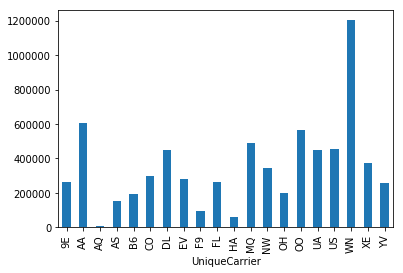

In [13]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance traveled in year 2008.**

In [14]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [13]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

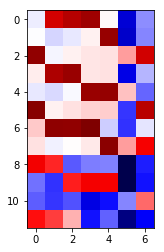

In [15]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

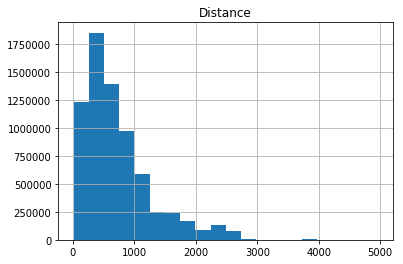

In [16]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [220]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [17]:
num_flights_by_date = flights_df.groupby('Date').size()

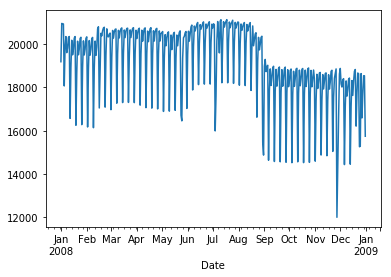

In [18]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

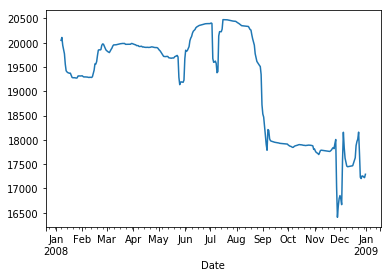

In [19]:
num_flights_by_date.rolling(window=7).mean().plot();

**We'll need a new column in our dataset - departure hour, let's create it.**

As we see, `DepTime` is distributed from 1 to 2400 (it is given in the `hhmm` format, check the [column description](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) again). We'll treat departure hour as `DepTime` // 100 (divide by 100 and apply the `floor` function). However, now we'll have both hour 0 and hour 24. Hour 24 sounds strange, we'll set it to be 0 instead (a typical imperfectness of real data, however, you can check that it affects only 521 rows, which is sort of not a big deal). So now values of a new column `DepHour` will be distributed from 0 to 23. There are some missing values, for now we won't fill in them, just ignore them. 

In [37]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [21]:
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

### Now it's your turn. Answer the questions below.

**1. How many unique carriers are there in our dataset?**

- 10
- 15
- 20
- 25 

In [17]:
flights_df['UniqueCarrier'].nunique()

20

**2. We have  both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference?** <br>


- Cancelled overweights completed by 329 flights<br>
<b>- Completed overweights cancelled by 6734860 flights</b><br>
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [40]:
com_flight=flights_df[flights_df.Cancelled==0]
cancel_flight=flights_df[flights_df.Cancelled==1]
len(com_flight),len(com_flight)-len(cancel_flight)

(6872294, 6734860)

**3. Find a flight with the longest departure delay and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

- yes, ATL

**- yes, HNL**
- yes, MSP
- no

In [31]:
##completed
flights_df.groupby('DepDelay').max().head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,Origin,Dest,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DepDelay,,,,,,,,,,,,,,,,,
-534.0,2008,9,29,1,136.0,HA,7,-519.0,LAS,HNL,2762,0,NaN,NaN,NaN,NaN,NaN


In [32]:
flights_df.groupby('ArrDelay').max().head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ArrDelay,,,,,,,,,,,,,,,,,,
-519.0,2008,9,29,1,136.0,HA,7,-534.0,LAS,HNL,2762,0,NaN,NaN,NaN,NaN,NaN,NaN


**4. Find the carrier that has the greatest number of cancelled flights.**

- AA
- MQ
- WN
- CO 

In [35]:
cancel_flight.groupby('UniqueCarrier').size().sort_values()

UniqueCarrier
AQ       42
F9      303
HA      570
AS     2139
FL     2236
NW     2906
B6     3205
CO     3702
EV     5026
OH     6462
US     6582
DL     6813
9E     7100
YV     9219
XE     9992
UA    10541
WN    12389
OO    12436
AA    17440
MQ    18331
dtype: int64

**5. Let's examine departure time and consider distribution by hour (column `DepHour` that we've created earlier). Which hour has the highest percentage of flights?**<br>

- 1 am 
- 5 am  
- 8 am
- 3 pm 

In [39]:
flights_df.groupby('DepHour').size().sort_values()

DepHour
3.0        833
2.0       1851
4.0       3390
1.0       5861
0.0      20368
23.0     46103
22.0    119651
5.0     148167
21.0    254850
20.0    285991
19.0    387288
18.0    400784
15.0    411126
14.0    416875
12.0    424249
10.0    431460
17.0    432488
16.0    434017
9.0     434850
13.0    435917
7.0     436700
11.0    444702
6.0     446737
8.0     449224
dtype: int64

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

- 2 am
- 9 pm  
- 8 am  
- 3 am 

In [41]:
cancel_flight.groupby('DepHour').size().sort_values()

DepHour
2.0      1
4.0      1
1.0      4
0.0      7
23.0    24
5.0     24
13.0    47
20.0    51
12.0    53
9.0     56
22.0    57
14.0    57
10.0    57
11.0    59
18.0    66
15.0    73
16.0    73
17.0    73
8.0     79
6.0     80
19.0    81
21.0    82
7.0     83
dtype: int64

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

- 3
- 19
- 22
- 4 

In [46]:
cancelbytime=cancel_flight['DepHour'].unique()

cancelbytime

In [53]:
com_flight.groupby('DepHour').size().sort_values()

DepHour
3.0        833
2.0       1850
4.0       3389
1.0       5857
0.0      20361
23.0     46079
22.0    119594
5.0     148143
21.0    254768
20.0    285940
19.0    387207
18.0    400718
15.0    411053
14.0    416818
12.0    424196
10.0    431403
17.0    432415
16.0    433944
9.0     434794
13.0    435870
7.0     436617
11.0    444643
6.0     446657
8.0     449145
dtype: int64

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*Hint:* Consider only *completed* flights.

- 4
- 7
- 8
- 17 

In [54]:
com_flight.groupby('DepHour')['DepDelay'].mean().sort_values()

DepHour
5.0      -4.253906
6.0      -1.629883
7.0       0.102539
8.0       1.760742
4.0       3.375000
9.0       3.753906
10.0      5.460938
11.0      6.683594
12.0      7.902344
13.0      8.812500
14.0     10.351562
15.0     11.875000
16.0     11.882812
17.0     13.210938
18.0     15.343750
19.0     16.875000
20.0     22.781250
21.0     23.031250
22.0     38.031250
23.0     60.000000
0.0      70.750000
3.0      95.812500
1.0     111.812500
2.0     122.562500
Name: DepDelay, dtype: float16

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-6 am
- yes, at 9-10 am
- yes, at 2-4 pm

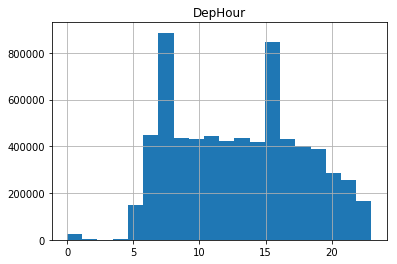

In [55]:
com_flight.hist('DepHour', bins=20);

In [59]:
com_flight.groupby('DepHour').size().sort_values(ascending=False)

DepHour
8.0     449145
6.0     446657
11.0    444643
7.0     436617
13.0    435870
9.0     434794
16.0    433944
17.0    432415
10.0    431403
12.0    424196
14.0    416818
15.0    411053
18.0    400718
19.0    387207
20.0    285940
21.0    254768
5.0     148143
22.0    119594
23.0     46079
0.0      20361
1.0       5857
4.0       3389
2.0       1850
3.0        833
dtype: int64

**10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

- at noon
- at 7 am 
- at 8 am
- at 10 am

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV

In [246]:
com_flight.groupby('UniqueCarrier').size().sort_values(ascending=False).head(10)

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- Carrier
- Weather conditions
- National Air System
- Security reasons

A	Carrier
B	Weather
C	National Air System
D	Security

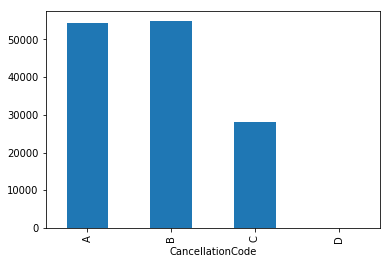

In [81]:
numcan=cancel_flight.groupby("CancellationCode").size().plot(kind="bar")

**13. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (SFO-LAX)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [90]:
def getroute(org,dest):
    route=''.join([org,"-",dest])
    return route
flights_df["route"]=flights_df.apply(lambda row:getroute(row["Origin"],row["Dest"]),axis=1)

In [93]:
flights_df.groupby('route').size().sort_values(ascending=False)

route
SFO-LAX    13788
LAX-SFO    13390
OGG-HNL    12383
LGA-BOS    12035
BOS-LGA    12029
HNL-OGG    12014
LAX-LAS    11773
LAS-LAX    11729
LAX-SAN    11257
SAN-LAX    11224
DCA-LGA    11102
LGA-DCA    11063
LGA-ORD    10862
ORD-LGA    10770
HNL-LIH    10769
LAS-PHX    10626
LGA-ATL    10507
ATL-LGA    10506
LIH-HNL    10407
PHX-LAS    10337
PHX-LAX     9992
LAX-PHX     9897
DFW-ATL     9849
ATL-DFW     9847
DAL-HOU     9790
HOU-DAL     9766
ORD-MSP     9688
ATL-MCO     9613
MCO-ATL     9611
MSP-ORD     9356
           ...  
MCI-LNK        1
MCI-MGM        1
SGF-FSD        1
BTR-MSY        1
SFO-SJC        1
AVP-HPN        1
SJC-BFL        1
LNK-ABE        1
LMT-MFR        1
LIT-SAT        1
PSP-ONT        1
PSP-TWF        1
ATW-CHS        1
ATW-DSM        1
LGB-GEG        1
LGB-ONT        1
LGB-TWF        1
ATW-XNA        1
CLT-GRR        1
SJU-PIT        1
DEN-ROC        1
PVD-BDL        1
AUS-DSM        1
AUS-DTW        1
SJC-SMX        1
SJC-SFO        1
DEN-PIH        1
LIT-MCO 

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [97]:
delay_df=flights_df[flights_df.DepDelay>0]
wdelay_df=delay_df[delay_df.WeatherDelay>0]

In [115]:
top5=delay_df.groupby("route").size().sort_values(ascending=False).head(5).index
toplist=top5.tolist()

In [122]:
wdelay_df[wdelay_df.route.isin(toplist)].groupby("route").size()

route
DAL-HOU    133
HOU-DAL    129
LAX-SFO    109
ORD-LGA    266
SFO-LAX     31
dtype: int64

**15. Examine the hourly distribution of departure times. Choose all correct statements:**

 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB29D18160>]],
      dtype=object)

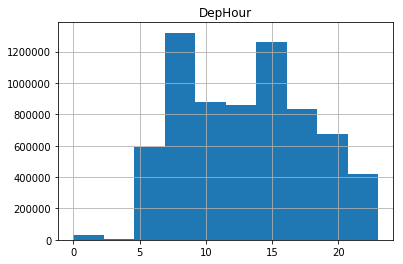

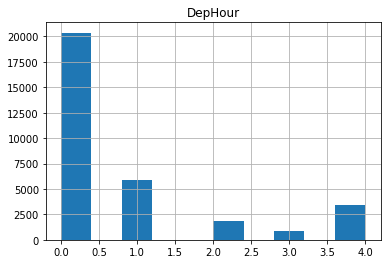

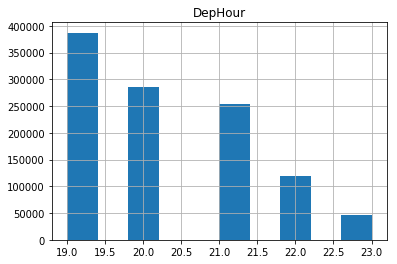

In [124]:
flights_df.hist("DepHour")
## 0-4 am flights
flights_df[flights_df.DepHour<5].hist("DepHour")
## After 7 pm flights
flights_df[flights_df.DepHour>18].hist("DepHour")

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days). 
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Northern Hemisphere.

In [243]:
weekday_df=flights_df[(flights_df.weekdays!="Saturday")&(flights_df.weekdays!="Sunday")]
weekend_df=flights_df[(flights_df.weekdays=="Saturday")|(flights_df.weekdays=="Sunday")]

In [245]:
len(weekday_df),len(weekend_df)

(5175305, 1834423)

In [244]:
flights_df.groupby("weekdays").count()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,route,Date
weekdays,,,,,,,,,,,,,,,,,,,,,
Friday,1035166,1035166,1035166,1035166,1011381,1035166,1035166,1008872,1011381,1035166,...,1035166,23962,258010,258010,258010,258010,258010,1011381,1035166,1035166
Monday,1036201,1036201,1036201,1036201,1015833,1036201,1036201,1013410,1015833,1036201,...,1036201,20513,225236,225236,225236,225236,225236,1015833,1036201,1036201
Saturday,857536,857536,857536,857536,844112,857536,857536,841663,844112,857536,...,857536,13567,167922,167922,167922,167922,167922,844112,857536,857536
Sunday,976887,976887,976887,976887,958906,976887,976887,956127,958906,976887,...,976887,18138,220823,220823,220823,220823,220823,958906,976887,976887
Thursday,1032224,1032224,1032224,1032224,1014470,1032224,1032224,1011970,1014470,1032224,...,1032224,17884,230363,230363,230363,230363,230363,1014470,1032224,1032224
Tuesday,1032049,1032049,1032049,1032049,1009095,1032049,1032049,1005992,1009095,1032049,...,1032049,23168,213254,213254,213254,213254,213254,1009095,1032049,1032049
Wednesday,1039665,1039665,1039665,1039665,1019685,1039665,1039665,1016995,1019685,1039665,...,1039665,20202,209127,209127,209127,209127,209127,1019685,1039665,1039665


**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather. 
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

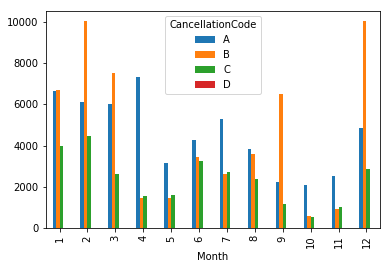

In [134]:
cancel_flight.groupby(["Month","CancellationCode"]).count()["Cancelled"].unstack().plot(kind='bar')

**18. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [151]:
cancel_flight[cancel_flight.CancellationCode=='A'].groupby(["Month","UniqueCarrier"]).size().unstack()

UniqueCarrier,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
Month,,,,,,,,,,,,,,,,,,,,
1,750.0,814.0,25.0,239.0,211.0,31.0,296.0,134.0,3.0,52.0,36.0,459.0,75.0,183.0,449.0,923.0,368.0,723.0,77.0,787.0
2,678.0,735.0,17.0,131.0,29.0,54.0,187.0,199.0,3.0,72.0,11.0,470.0,133.0,124.0,351.0,493.0,315.0,663.0,73.0,1352.0
3,772.0,989.0,NaN,70.0,64.0,94.0,516.0,198.0,6.0,74.0,36.0,389.0,173.0,189.0,372.0,591.0,403.0,511.0,238.0,353.0
4,391.0,3696.0,NaN,135.0,43.0,50.0,226.0,29.0,7.0,81.0,29.0,283.0,122.0,76.0,298.0,494.0,335.0,533.0,30.0,454.0
5,136.0,593.0,NaN,121.0,12.0,40.0,76.0,52.0,7.0,70.0,15.0,330.0,80.0,34.0,153.0,539.0,240.0,331.0,30.0,298.0
6,195.0,354.0,NaN,83.0,50.0,108.0,303.0,106.0,15.0,79.0,17.0,349.0,225.0,117.0,262.0,777.0,412.0,277.0,63.0,459.0
7,163.0,492.0,NaN,73.0,103.0,139.0,459.0,141.0,13.0,173.0,151.0,353.0,80.0,203.0,375.0,1104.0,441.0,487.0,40.0,302.0
8,113.0,707.0,NaN,112.0,53.0,57.0,262.0,191.0,5.0,67.0,47.0,264.0,61.0,136.0,154.0,589.0,323.0,317.0,105.0,289.0
9,110.0,331.0,NaN,46.0,10.0,44.0,157.0,28.0,9.0,46.0,11.0,223.0,34.0,37.0,136.0,185.0,204.0,460.0,18.0,157.0


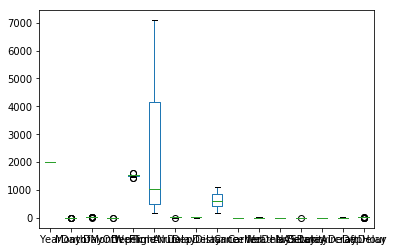

In [157]:
delay_df=flights_df[(flights_df['DepDelay']>0)&(flights_df['ArrDelay']>0)]


In [203]:
aggtable=delay_df.groupby("UniqueCarrier").agg("median")
aggtable[["ArrDelay","DepDelay"]].head(5)

,ArrDelay,DepDelay
UniqueCarrier,,
9E,27.0,25.0
AA,28.0,26.0
AQ,10.0,9.0
AS,21.0,19.0
B6,35.0,31.0


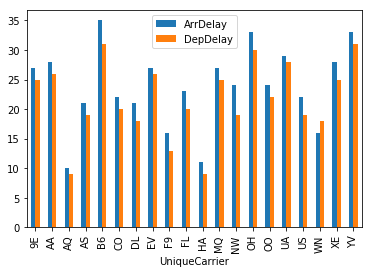

In [201]:
aggtable[["ArrDelay","DepDelay"]].plot(kind='bar')

In [192]:

delay_tb=delay_df.groupby("UniqueCarrier")


**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

- EV
- OO
- AA
- AQ

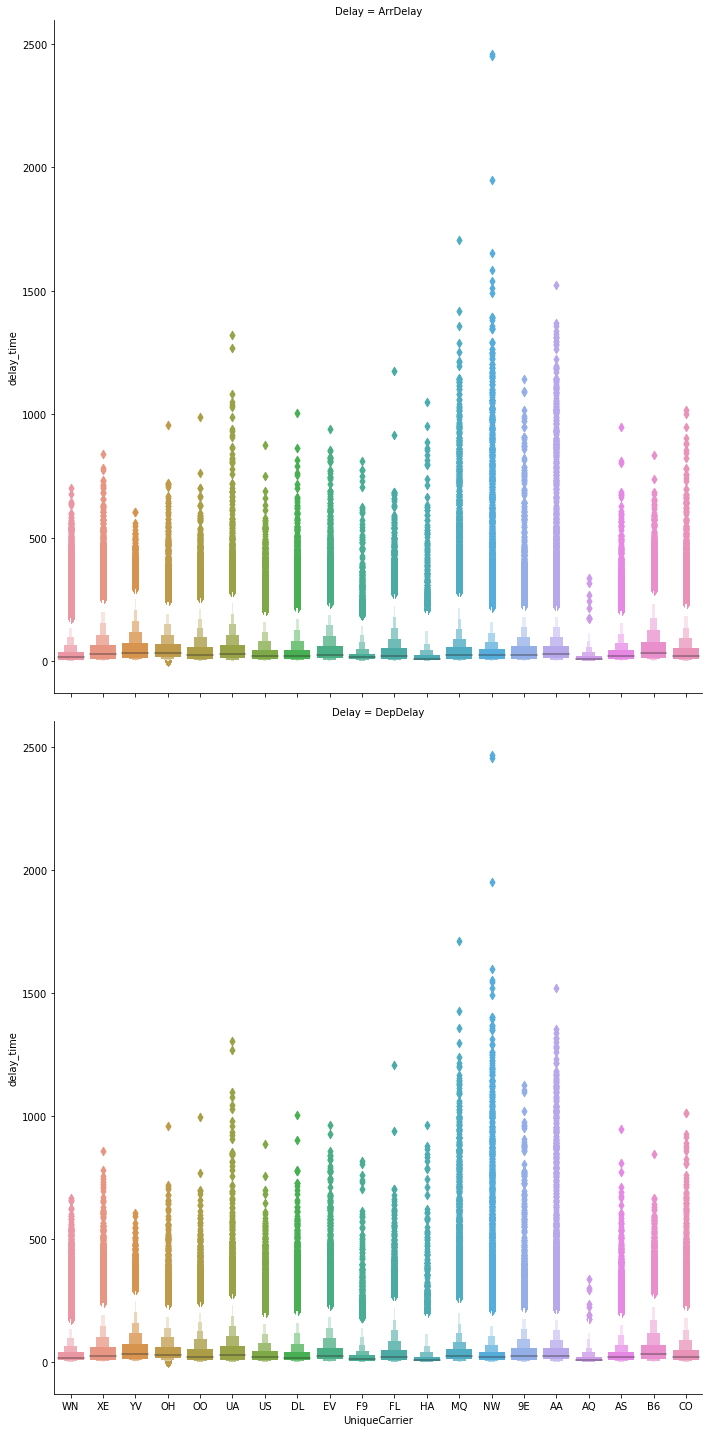

In [218]:
delay_mtb=delay_df.melt(id_vars=["UniqueCarrier"],value_vars=["ArrDelay","DepDelay"],var_name="Delay",value_name="delay_time")
g=sns.catplot(x="UniqueCarrier", y="delay_time", row="Delay",data=delay_mtb, kind="boxen", height=10,outlier_prop=0.1, sharey=False)


That's it! Now go and do 30 push-ups! :)